<a href="https://colab.research.google.com/github/SJDL123/DataScience/blob/main/BREAST_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Load: Loading data into a dataframe**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
data=pd.read_csv('/content/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.shape

(569, 32)

In [6]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
data=data.drop(['id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Cleaning: Handle NA values

In [8]:
#No NA values in the data
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Data processing and visualization

In [9]:
# Encode the target variable (if needed, in case it's not already binary)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


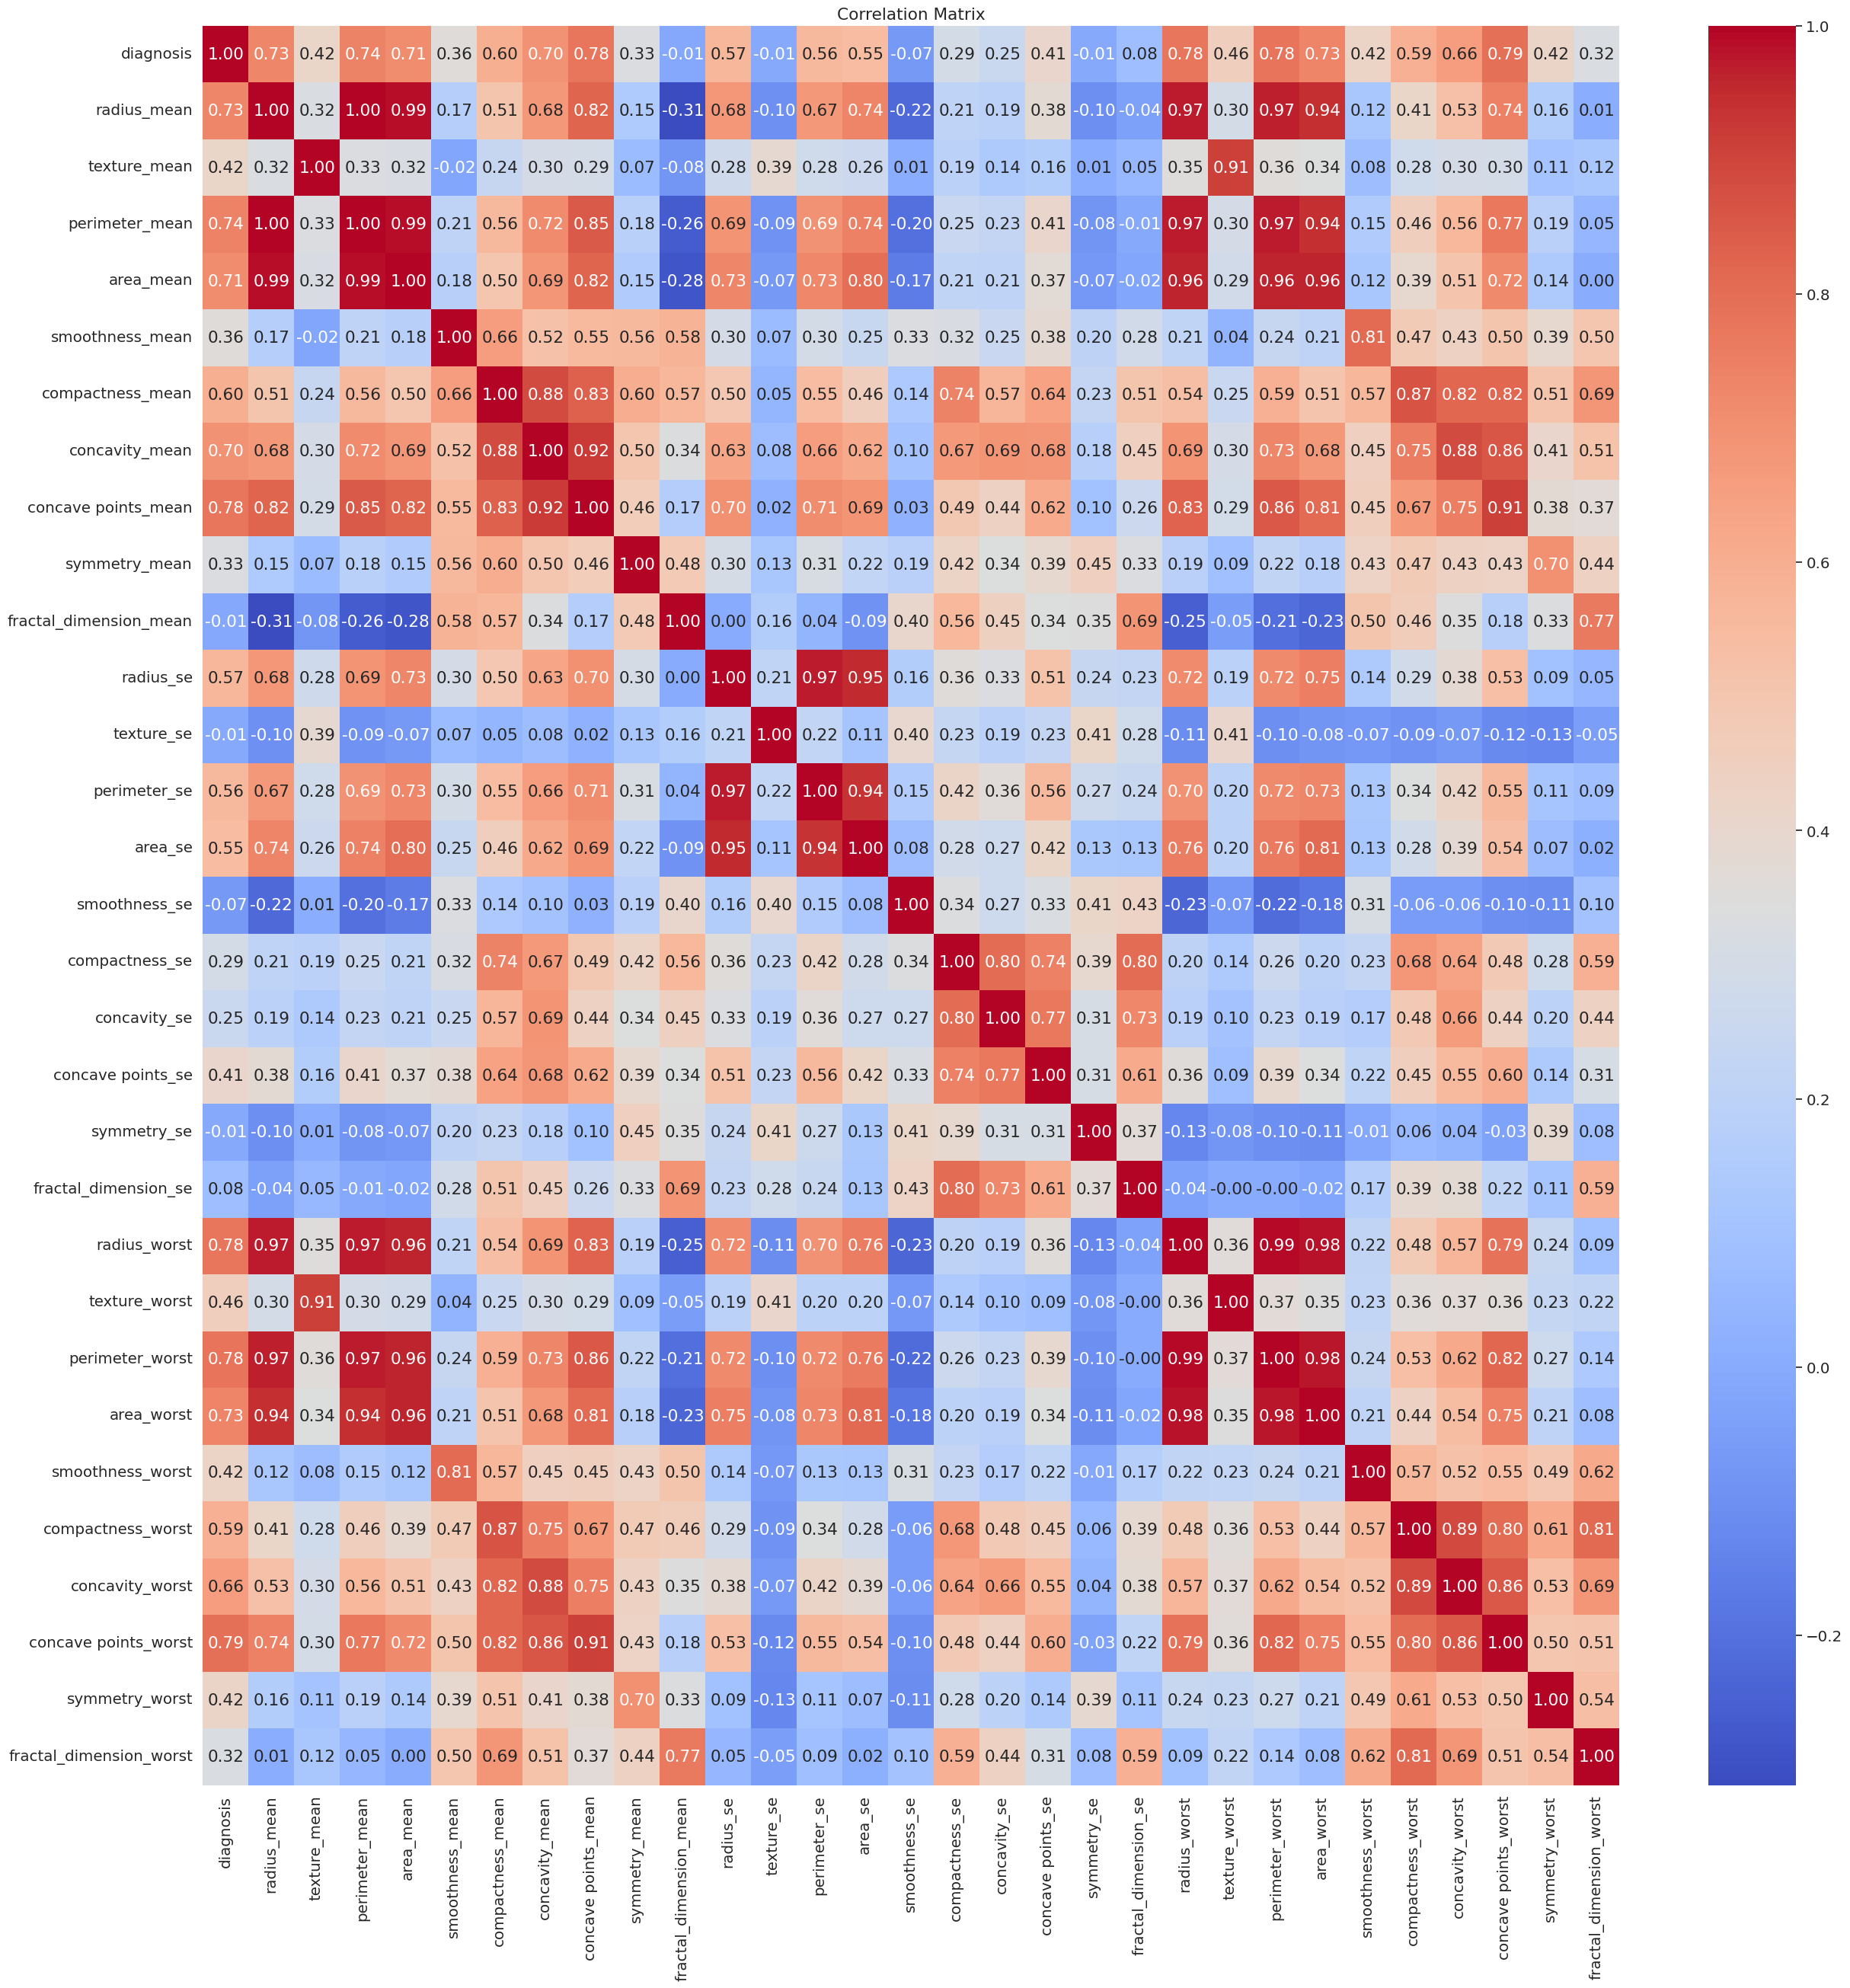

In [12]:
plt.figure(figsize=(30,30))
sn. set(font_scale=1.3)
sn.heatmap(data.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

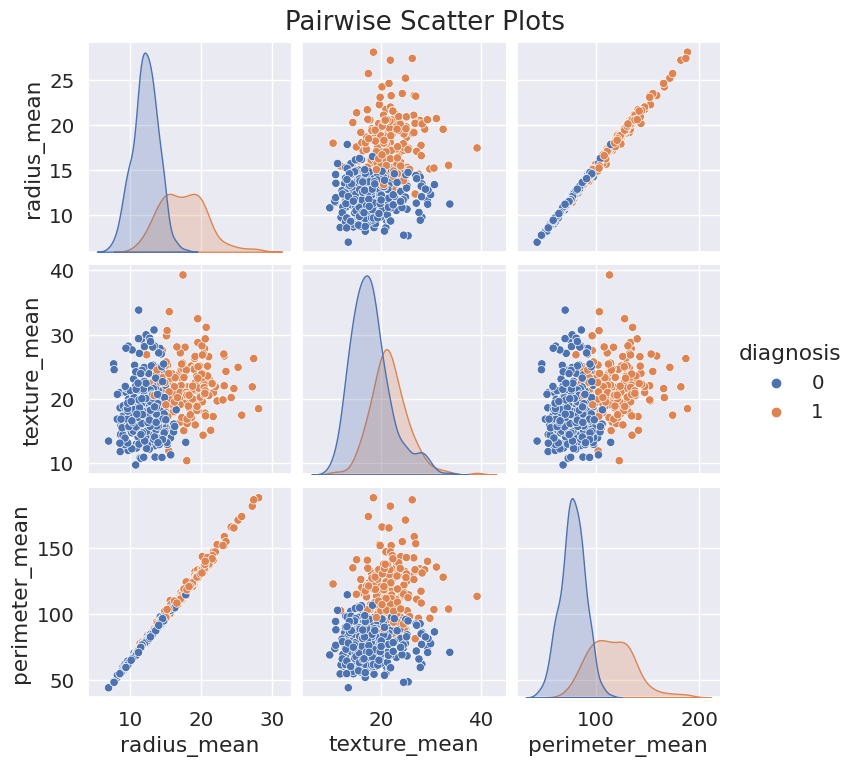

In [13]:
# Visualize pairwise relationships between features
sn.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'])
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

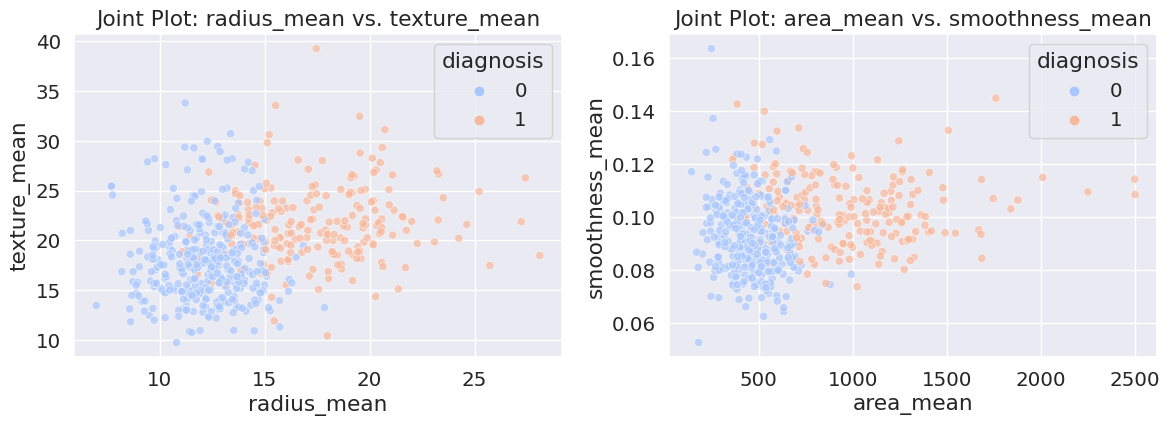

In [14]:
selected_feature_pairs = [('radius_mean', 'texture_mean'), ('area_mean', 'smoothness_mean')]

plt.figure(figsize=(12, 8))
for i, (feat1, feat2) in enumerate(selected_feature_pairs):
    plt.subplot(2, 2, i+1)
    sn.scatterplot(x=feat1, y=feat2, hue='diagnosis', data=data, palette='coolwarm', alpha=0.7)
    plt.title(f"Joint Plot: {feat1} vs. {feat2}")

plt.tight_layout()
plt.show()

# Data Cleaning

***Outlier Removal Using Z-Score***

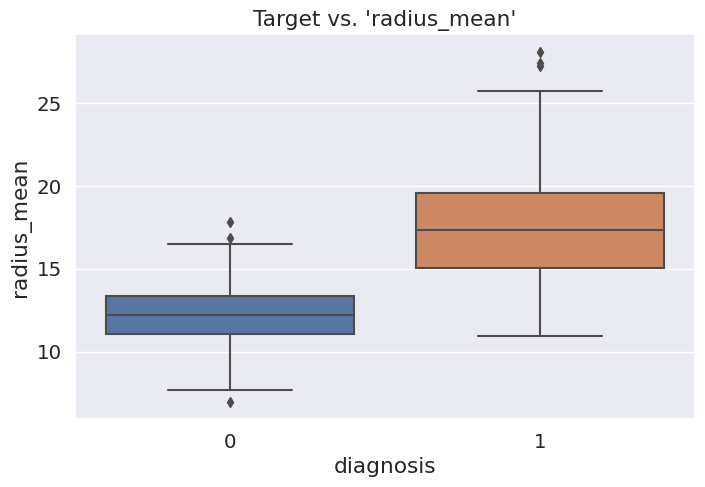

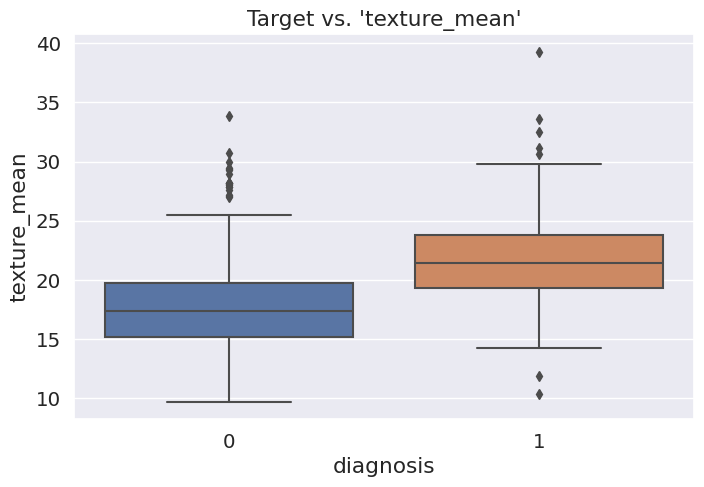

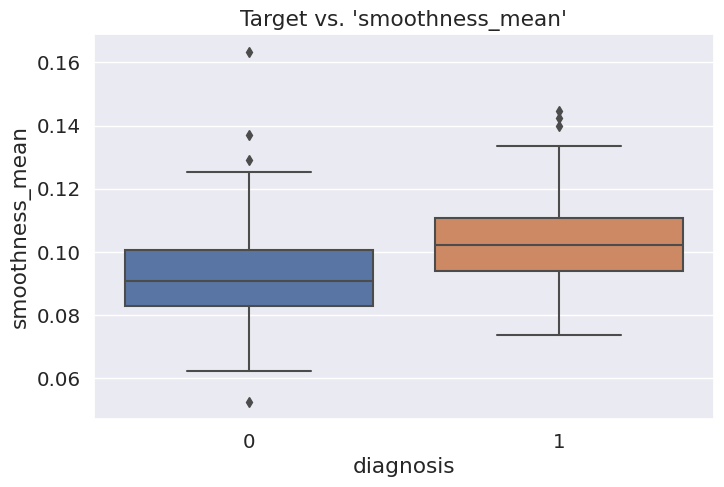

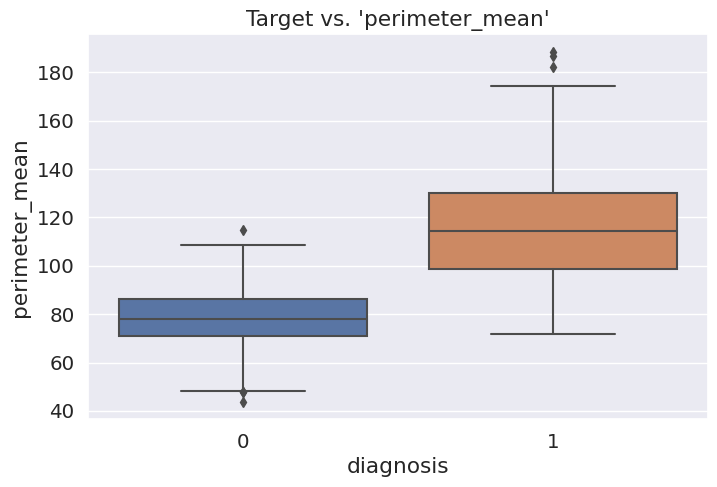

In [15]:
# Analyze how the target variable (diagnosis) relates to each feature
features_for_target_analysis = ['radius_mean','texture_mean','smoothness_mean','perimeter_mean']
for feature in features_for_target_analysis:
    plt.figure(figsize=(8, 5))
    sn.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f"Target vs. '{feature}'")
    plt.show()

In [16]:
# Identify and handle outliers (if needed) using appropriate techniques like IQR or Z-score.
# For example, using Z-score:
from scipy.stats import zscore
data_cleaned = data[(np.abs(zscore(data.drop('diagnosis', axis=1))) < 3).all(axis=1)]

In [17]:
data=data_cleaned
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


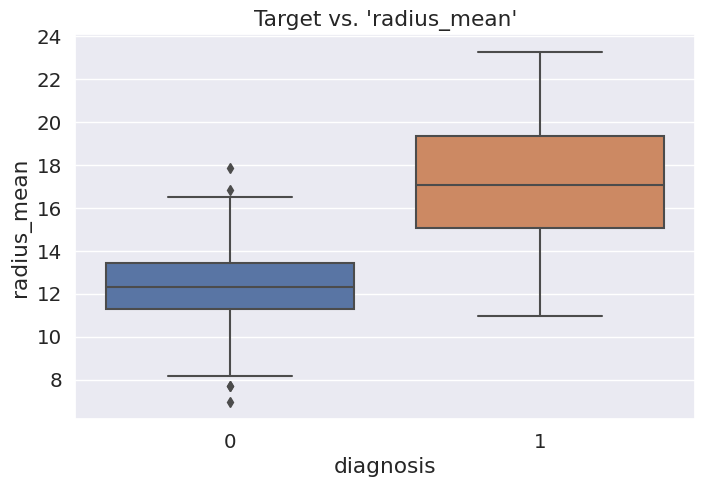

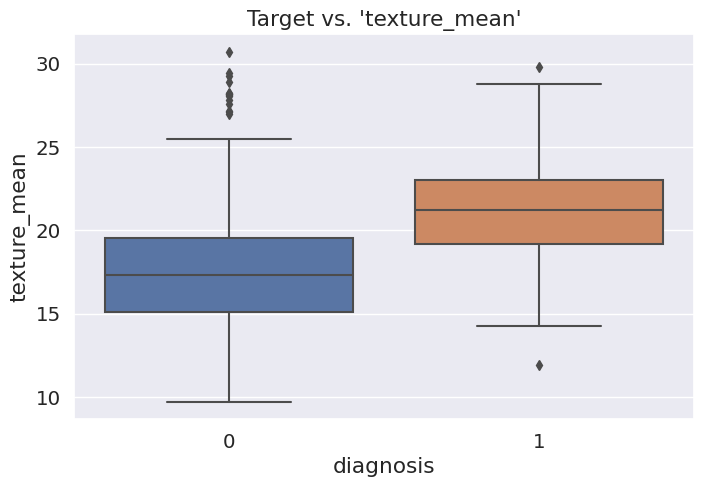

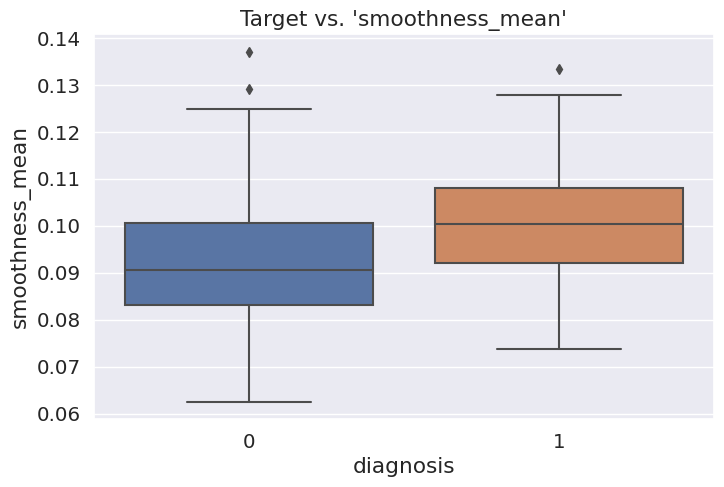

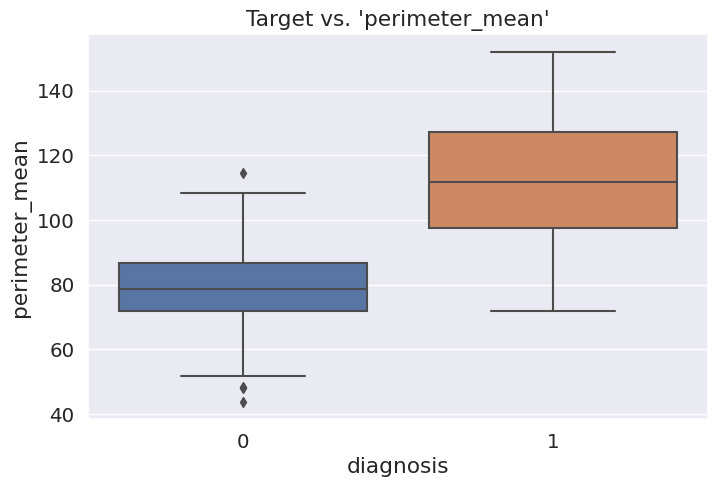

In [18]:
# Analyze how the target variable (diagnosis) relates to each feature
features_for_target_analysis = ['radius_mean','texture_mean','smoothness_mean','perimeter_mean']
for feature in features_for_target_analysis:
    plt.figure(figsize=(8, 5))
    sn.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f"Target vs. '{feature}'")
    plt.show()

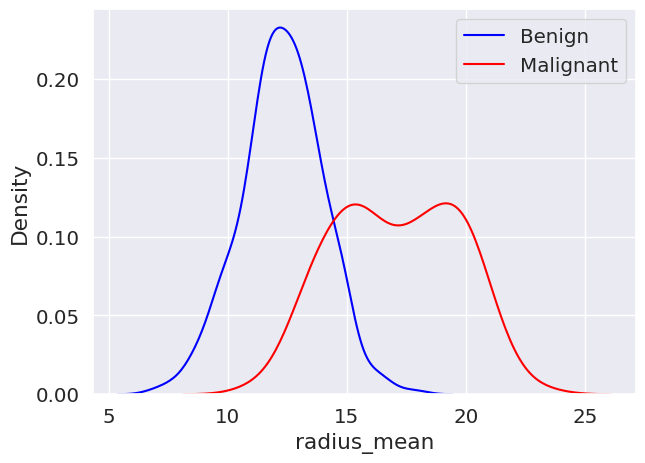

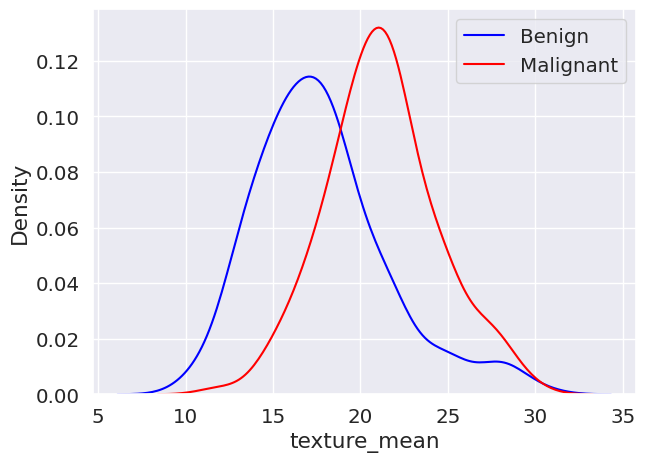

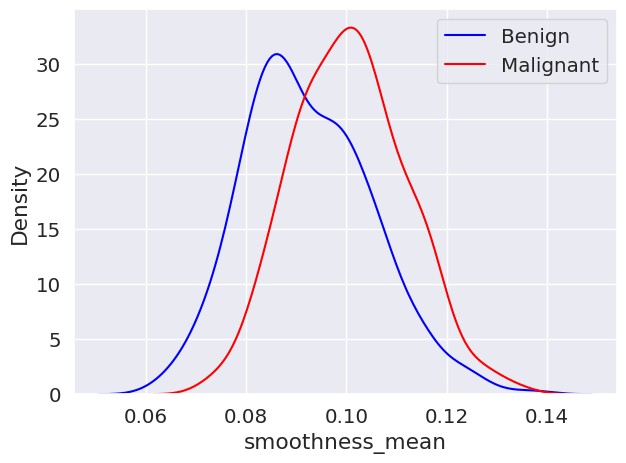

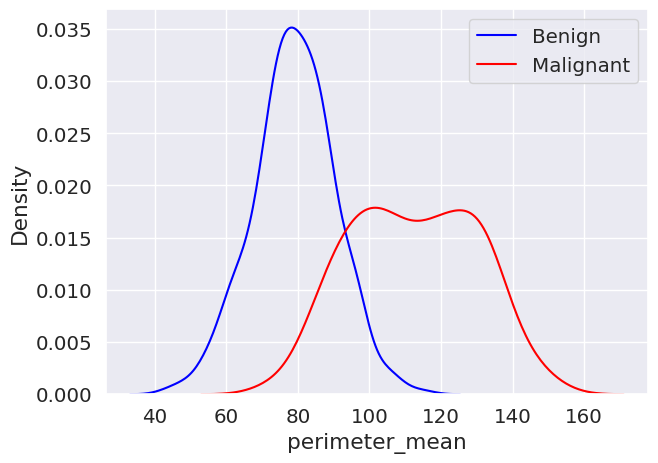

In [19]:
features=['radius_mean','texture_mean','smoothness_mean','perimeter_mean']
for feature in features:
    plt.figure(figsize=(7,5))
    sn.kdeplot(data.query('diagnosis == 0')[feature],color='blue',label='Benign')
    sn.kdeplot(data.query('diagnosis == 1')[feature],color='red',label='Malignant')
    plt.legend()
    plt.show()

# Build a Model Now...

In [20]:
data.shape

(495, 31)

In [21]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [34]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into features (X) and the target variable (y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)


In [35]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
# Perform Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# Set the desired number of components (e.g., 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Finding best model using GridSearchCV

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import ShuffleSplit
# Create a dictionary to store the models and their hyperparameter grids
models = {
    'SVM': {
        'model': SVC(random_state=42),
        'param_grid': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 5, 10],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'param_grid': {
            'C': [0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear'],
        },
        'regularization': 'l2'
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

# K-fold Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Best Score', 'Best Params'])

# Hyperparameter tuning and model evaluation for each classifier
for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Perform Grid Search with K-fold Cross-Validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and retrain the model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred_best = best_model.predict(X_test)

    # Compute the best accuracy
    best_accuracy = accuracy_score(y_test, y_pred_best)

    # Store the results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Best Score': best_accuracy, 'Best Params': best_params}, ignore_index=True)
     # Print the classification report and confusion matrix
# Print the results DataFrame
print("Results:")
print(results_df)

Results:
                  Model  Best Score                               Best Params
0                   SVM    0.989899              {'C': 1, 'kernel': 'linear'}
1         Random Forest    0.969697   {'max_depth': None, 'n_estimators': 50}
2         Decision Tree    0.919192  {'max_depth': 5, 'min_samples_split': 5}
3   Logistic Regression    0.989899           {'C': 1, 'solver': 'liblinear'}
4  Gaussian Naive Bayes    0.929293                                        {}


In [38]:
res=results_df.sort_values(by='Best Score',ascending=False)

In [39]:
res

,Model,Best Score,Best Params
0,SVM,0.989899,"{'C': 1, 'kernel': 'linear'}"
3,Logistic Regression,0.989899,"{'C': 1, 'solver': 'liblinear'}"
1,Random Forest,0.969697,"{'max_depth': None, 'n_estimators': 50}"
4,Gaussian Naive Bayes,0.929293,{}
2,Decision Tree,0.919192,"{'max_depth': 5, 'min_samples_split': 5}"


In [40]:
best_model=res['Model'][0]
best_params=res['Best Params'][0]
print(best_model)
print(best_params)

SVM
{'C': 1, 'kernel': 'linear'}


In [41]:
#Create a Support Vector Machine (SVM) model
reg=SVC(C=1,kernel='linear').fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.98989898989899

Text(49.75, 0.5, 'Truth')

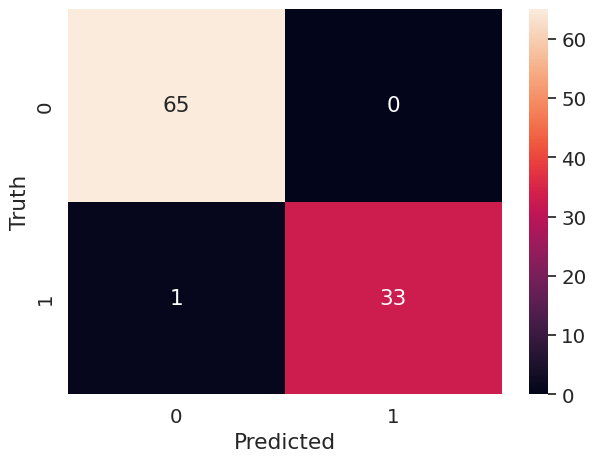

In [42]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#classification report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
classification_df

,precision,recall,f1-score,support
0,0.984848,1.000000,0.992366,65.000000
1,1.000000,0.970588,0.985075,34.000000
accuracy,0.989899,0.989899,0.989899,0.989899
macro avg,0.992424,0.985294,0.988721,99.000000
weighted avg,0.990052,0.989899,0.989862,99.000000


In [46]:
# Save the SVM model as a pickle file
import pickle
with open('cancer_pred_model.pickle', 'wb') as file:
    pickle.dump(reg, file)